# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

For a used car dealership, the dealer would like to know what attributes of a car would effect it's customer value. 
For example:
Is the car price related to the its year of ownership? 
Is the car price affected by its horsepower or mpg?
Is the care prices related to its brand? etc.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/vehicles.csv')

In [3]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [44]:
data['type'].unique()

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

The dataset has 426800 rows of data, but not rows have entries in each column. We need to pick attributes that don't have a lot null values in it and are related to the bueinsss understanding.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [50]:
data1 = data.drop(columns = ['VIN','model','region','id','state'])

In [51]:
data1

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN
426876,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red
426877,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white
426878,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver


In [52]:
dummies = pd.get_dummies(data1.select_dtypes(include = 'object'))

In [53]:
data_w_dummies = pd.concat([data1, dummies], axis=1)

In [54]:
data1_w_dummies = data_w_dummies.drop(columns = data1.select_dtypes(include = 'object').columns)

In [55]:
corr = data1_w_dummies.corr()[['price']]

In [57]:
corr.abs().sort_values(by = 'price',ascending = False).head(6)

,price
price,1.000000
odometer,0.010032
condition_fair,0.007147
manufacturer_mercedes-benz,0.006323
year,0.004925
paint_color_green,0.004854


In [60]:
df = data1_w_dummies[['price','odometer','condition_fair','manufacturer_mercedes-benz','year','paint_color_green']].dropna()

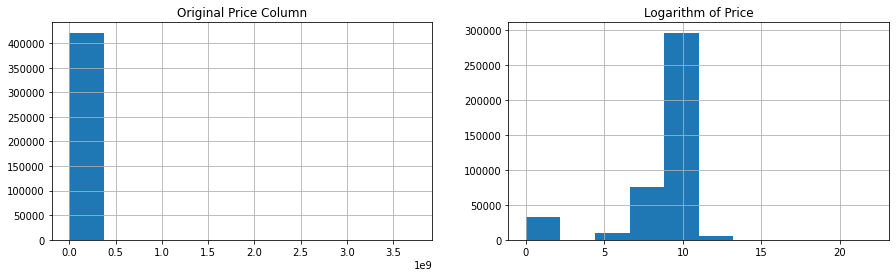

In [64]:
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].hist(df['price'])
ax[0].grid()
ax[0].set_title('Original Price Column')
ax[1].hist(np.log1p(df['price']))
ax[1].grid()
ax[1].set_title('Logarithm of Price');

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [96]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="text")

import seaborn as sns
import plotly.express as px

In [68]:
df_x = df.drop('price', axis = 1)
df_y = np.log1p(df['price'])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1)

Linear Regression

In [82]:
linreg =  LinearRegression()
linreg.fit(X_train, y_train)
train_preds = linreg.predict(X_train)
test_preds = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f'Train MSE: {train_mse: .4f}')
print(f'Test MSE: {test_mse: .4f}')

Train MSE:  7.3555
Test MSE:  7.3886


Sequential Selector

In [83]:
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=3)

pipe_s = Pipeline([('column_selector', selector),
                ('linreg', LinearRegression())])
pipe_s.fit(X_train, y_train)
train_pred_s = pipe_s.predict(X_train)
test_pred_s = pipe_s.predict(X_test)
train_mse_s = mean_squared_error(y_train, train_pred_s)
test_mse_s = mean_squared_error(y_test, test_pred_s)

print(f'Train MSE: {train_mse_s: .4f}')
print(f'Test MSE: {test_mse_s: .4f}')

Train MSE:  7.3580
Test MSE:  7.3913


Lasso and polyfeatures

In [84]:
pipe_1 = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 1))])
pipe_1.fit(X_train, y_train)

lasso_train_mse = mean_squared_error(y_train, pipe_1.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, pipe_1.predict(X_test))


print(f'Train MSE: {lasso_train_mse: .4f}')
print(f'Test MSE: {lasso_test_mse: .4f}')

Train MSE:  7.3932
Test MSE:  7.4181


Ridge with polyfeatures

In [100]:
ridge_param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False))
                        ,('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
ridge_grid1 = ridge_grid.best_estimator_
ridge_train_preds = ridge_grid1.predict(X_train)
ridge_test_preds = ridge_grid1.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)


print(f'Train MSE: {ridge_train_mse:.4f}')
print(f'Test MSE: {ridge_test_mse:.4f}')

Train MSE: 7.3036
Test MSE: 7.3300


K-fold

In [89]:
model_finder =  GridSearchCV(ridge_pipe, param_grid=ridge_param_dict,scoring = 'neg_mean_squared_error',cv = 10)
model_finder.fit(X_train, y_train)
best_model = model_finder.best_estimator_
k_train_preds = best_model.predict(X_train)
k_test_preds = best_model.predict(X_test)
k_train_mse = mean_squared_error(y_train, k_train_preds)
k_test_mse = mean_squared_error(y_test, k_test_preds)

print(f'Train MSE: {k_train_mse:.4f}')
print(f'Test MSE: {k_test_mse:.4f}')

Train MSE: 7.3516
Test MSE: 7.3818


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Based on test and tain MSE, the Ridge model with polyfeatures of 3 and standardization provides the least mean squared error result and therefore, is the best modle. 

In [106]:
from sklearn.inspection import permutation_importance


In [107]:
r = permutation_importance(ridge_grid1, X_test, y_test,
...                            n_repeats=30,
...                            random_state=0)

In [110]:
for i in r.importances_mean.argsort()[::-1]:
...     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
...         print(f"{df_x.columns[i]:<8}"
                  "   "
...               f"{r.importances_mean[i]:.3f}"
...               f" +/- {r.importances_std[i]:.3f}")

odometer   0.015 +/- 0.003
year       0.005 +/- 0.000
condition_fair   0.002 +/- 0.000
paint_color_green   0.000 +/- 0.000


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

For used car dealers who are looking for a way to evaluate the value of a customer car, this analysis provides an overall model based on five features: the odometer reading, the conditiong of the used car, the manufacturer of the car,year of the used car and the paint color of the car. We identified these features are most relevant to the ultimate price of the used car regardless of regional difference. Among with the odometer read are of the highest importance. To max out profit, dealers are encouraged to get used cars with lower odometer read.  